### Import Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

### Import Dataset

In [2]:
%matplotlib inline

In [3]:
# Path
base_path = Path.home()
project_path = base_path / 'Desktop' / 'Career Foundry' / 'Course' / 'Data Immersion' / '6 Advanced Analytics & Dashboard Design' / 'House Sales in King County, USA'

In [4]:
# Importing dataset
file_path = project_path / '02 Data' / 'Prepared Data' / 'kc_house_data_wrangled2.pkl'
df = pd.read_pickle(file_path)

In [166]:
# Displaying data in a float format
pd.set_option('display.float_format', '{:.2f}'.format)

### Data Cleaning

In [5]:
df.head()

,property_id,date,price,bedrooms,bathrooms,sqft_living,sqft_land_area,floors,waterfront,view,...,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longtitude,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area,Price category
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650,Low price
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,Middle price
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,Low price
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,Middle price
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,Middle price


In [6]:
df.columns

Index(['property_id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_land_area', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'year_built', 'year_renovated',
       'zipcode', 'latitude', 'longtitude', 'sqft_avg_neighbor_living',
       'sqft_avg_neighbor_land_area', 'Price category'],
      dtype='object')

In [7]:
# Renaming columns
df.rename(columns = {'Price category' : 'price category', 'longtitude': 'longitude'}, inplace = True)

In [8]:
# Creating dataset with only numerical variables
df_sub = df[['price', 'bedrooms', 'bathrooms', 'view', 'sqft_living','sqft_land_area', 'floors','condition', 'grade', 'sqft_above', 'sqft_basement', 'year_built', 'sqft_avg_neighbor_living', 'sqft_avg_neighbor_land_area', 'latitude', 'longitude']]

In [9]:
df_sub.head()

,price,bedrooms,bathrooms,view,sqft_living,sqft_land_area,floors,condition,grade,sqft_above,sqft_basement,year_built,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area,latitude,longitude
0,221900.0,3,1.00,0,1180,5650,1.0,3,7,1180,0,1955,1340,5650,47.5112,-122.257
1,538000.0,3,2.25,0,2570,7242,2.0,3,7,2170,400,1951,1690,7639,47.7210,-122.319
2,180000.0,2,1.00,0,770,10000,1.0,3,6,770,0,1933,2720,8062,47.7379,-122.233
3,604000.0,4,3.00,0,1960,5000,1.0,5,7,1050,910,1965,1360,5000,47.5208,-122.393
4,510000.0,3,2.00,0,1680,8080,1.0,3,8,1680,0,1987,1800,7503,47.6168,-122.045


### Data Standardization

In [53]:
# Standardization
sc = StandardScaler()
scaled = sc.fit_transform(df_sub)

In [54]:
# View Standardization
df_scaled = pd.DataFrame(scaled, columns=df_sub.columns)
df_scaled.head()

,price,bedrooms,bathrooms,view,sqft_living,sqft_land_area,floors,condition,grade,sqft_above,sqft_basement,year_built,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area,latitude,longitude,clusters
0,-0.870495,-0.408192,-1.451297,-0.306521,-0.982141,-0.228368,-0.918286,-0.631106,-0.563568,-0.737018,-0.658866,-0.547887,-0.945545,-0.260684,-0.353182,-0.307384,0.168800
1,-0.009924,-0.408192,0.172272,-0.306521,0.530140,-0.190042,0.932272,-0.631106,-0.563568,0.457177,0.244522,-0.684012,-0.435106,-0.188028,1.160543,-0.747432,1.182875
2,-0.984567,-1.510851,-1.451297,-0.306521,-1.428210,-0.123646,-0.918286,-0.631106,-1.415177,-1.231583,-0.658866,-1.296573,1.067043,-0.172576,1.282477,-0.137043,0.168800
3,0.169758,0.694467,1.146413,-0.306521,-0.133523,-0.244016,-0.918286,2.445132,-0.563568,-0.893831,1.396342,-0.207575,-0.916377,-0.284428,-0.283917,-1.272651,-0.845276
4,-0.086153,-0.408192,-0.152442,-0.306521,-0.438155,-0.169868,-0.918286,-0.631106,0.288041,-0.133889,-0.658866,0.541111,-0.274682,-0.192996,0.408731,1.197296,1.182875


### Elbow Technique

In [55]:
# Definining the range of potential clusters in the data.
num_cl = range(1, 10) 

In [56]:
# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [57]:
# Creatting a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] 
score

[-364395.0000000004,
 -288355.227977691,
 -243777.39597643988,
 -221075.09627091227,
 -210340.1127204791,
 -190092.56977609565,
 -178346.15630546823,
 -174907.6263754128,
 -161942.9282148551]

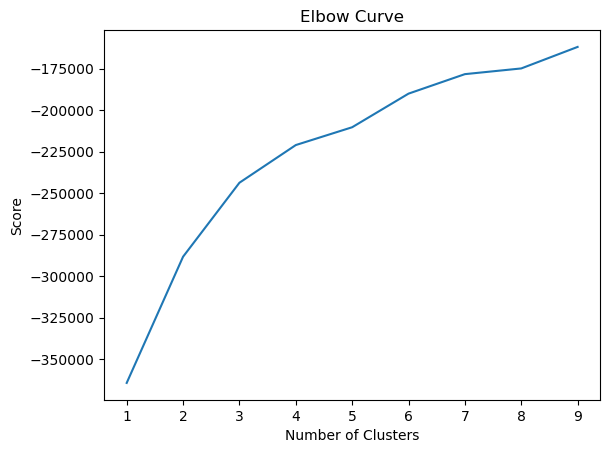

In [58]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve does not show a very distinct bend, however it begins to flatten out around 4 clusters. Although the breaking point is not very prominent, 4 clusters appear to be a reasonable choice.

### k-Means Clustering

In [149]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4)

In [150]:
# Fit the k-means object to the data.
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [151]:
#Create a new column with clusters
df_sub['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\monik\AppData\Local\Temp\ipykernel_16712\70217689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_scaled)


In [152]:
# View how many records falls into which clusters
df_sub['clusters'].value_counts()

clusters
0    7815
1    6329
2    4685
3    2606
Name: count, dtype: int64

In [153]:
df_sub.head()

,price,bedrooms,bathrooms,view,sqft_living,sqft_land_area,floors,condition,grade,sqft_above,sqft_basement,year_built,sqft_avg_neighbor_living,sqft_avg_neighbor_land_area,latitude,longitude,clusters
0,221900.0,3,1.00,0,1180,5650,1.0,3,7,1180,0,1955,1340,5650,47.5112,-122.257,0
1,538000.0,3,2.25,0,2570,7242,2.0,3,7,2170,400,1951,1690,7639,47.7210,-122.319,1
2,180000.0,2,1.00,0,770,10000,1.0,3,6,770,0,1933,2720,8062,47.7379,-122.233,0
3,604000.0,4,3.00,0,1960,5000,1.0,5,7,1050,910,1965,1360,5000,47.5208,-122.393,2
4,510000.0,3,2.00,0,1680,8080,1.0,3,8,1680,0,1987,1800,7503,47.6168,-122.045,1


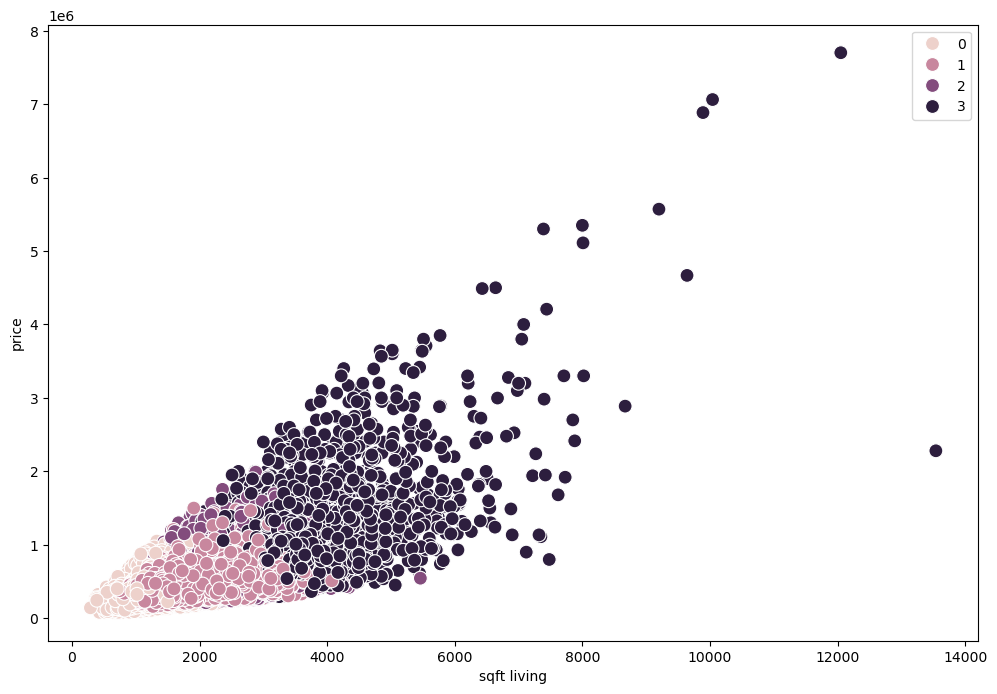

In [175]:
# Plot the clusters for the "price" and "sqft_living" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['sqft_living'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('sqft living') 
plt.ylabel('price') 
plt.show()

The 4 clusters divide the scatterplot into 4 categories: 

**Small Affordable Homes** (0 - 1500 sqft living, up to 1 mln price  - **Cluster 0**); 

**Medium Affordable Homes** (1500 - 3000 sqft, up to 1 mln - **Cluster 1**), 

**Medium Expensive Homes**(1500-3000 sqft, 1 - 2 mln - **Cluster 2**);

**Large Expensive Homes** (3000+ sqft, 1+ mln - **Cluster 3**)  

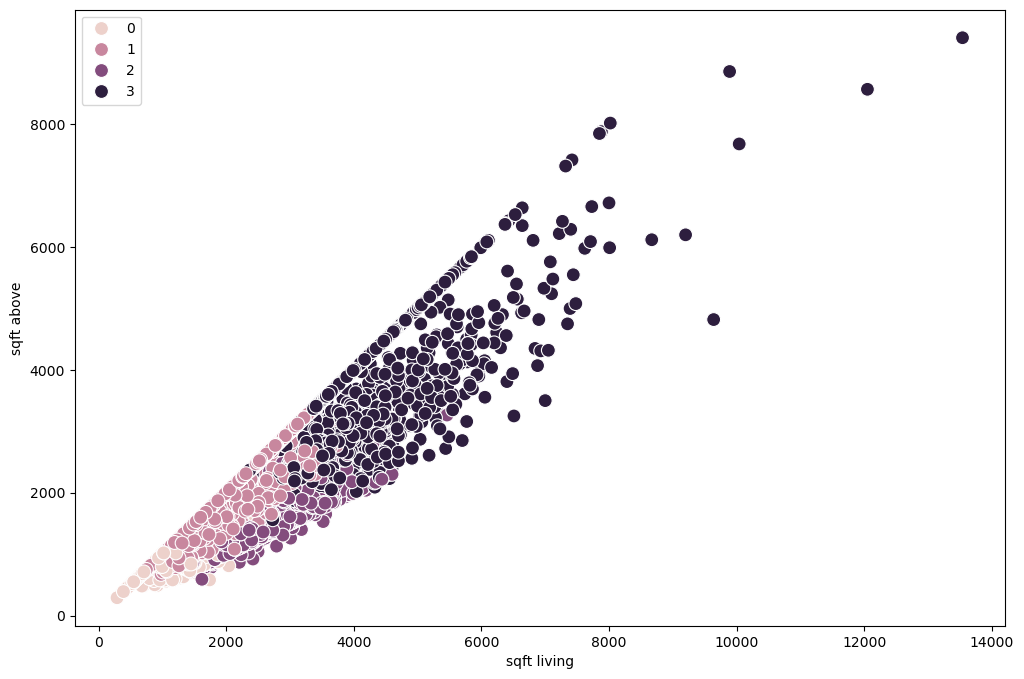

In [174]:
# Plot the clusters for the "sqft_above" and "sqft_living" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['sqft_living'], y=df_sub['sqft_above'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft living') # Label x-axis.
plt.ylabel('sqft above') # Label y-axis.
plt.show()

**Medium Expensive Homes** tend to have larger total living space but smaller above-ground living area compared to **Medium Affordable Homes**. This suggests that the additional living space for **Medium Expensive Homes** likely comes from basements. 

**Small Affordable Homes** have smaller sqft above, whereas, **Large Expensive Homes** have larger sqft area above.

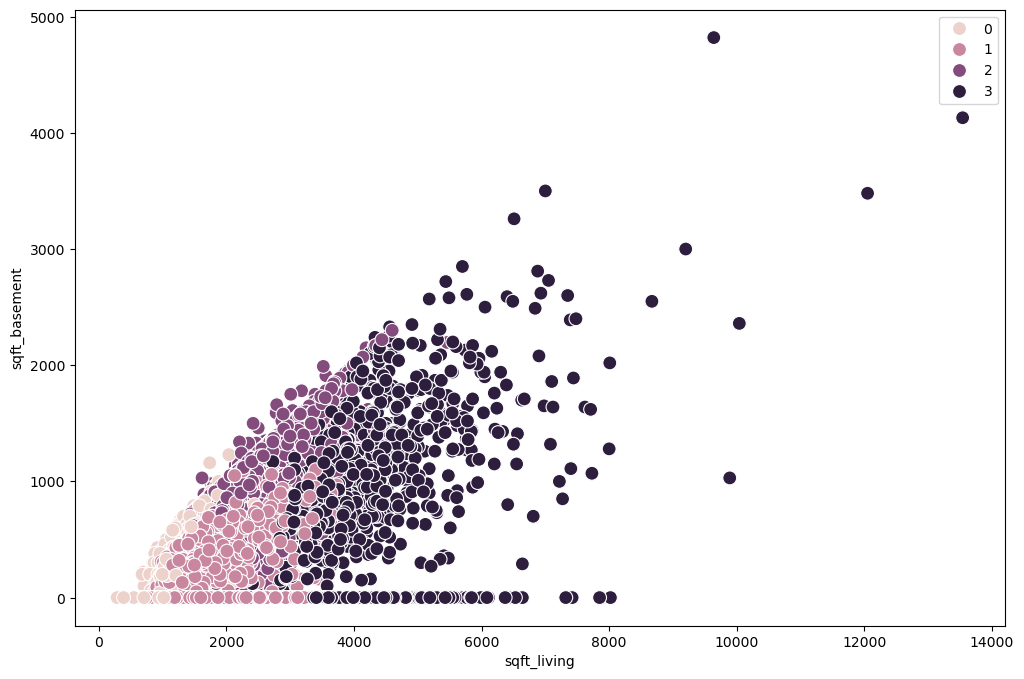

In [173]:
# Plot the clusters for the "sqft_living" and "sqft_basement" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['sqft_living'], y=df_sub['sqft_basement'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_living') # Label x-axis.
plt.ylabel('sqft_basement') # Label y-axis.
plt.show()

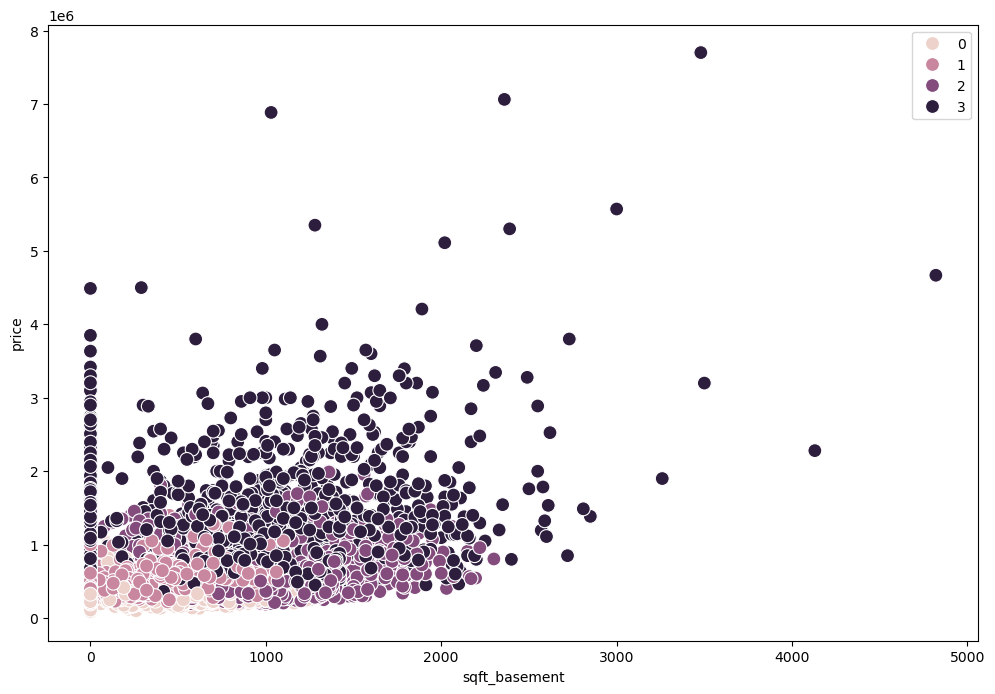

In [177]:
# Plot the clusters for the "price" and "sqft_basement" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['sqft_basement'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_basement') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

After comparing clusters in terms of basement sqft versus above sqft area, it can be concluded that the basement adds to the total living space, but it doesn’t contribute much to the price. Both Large Expensive Homes and Medium Expensive Homes tend to have larger basements, which increases total living space without proportionally increasing the price. 

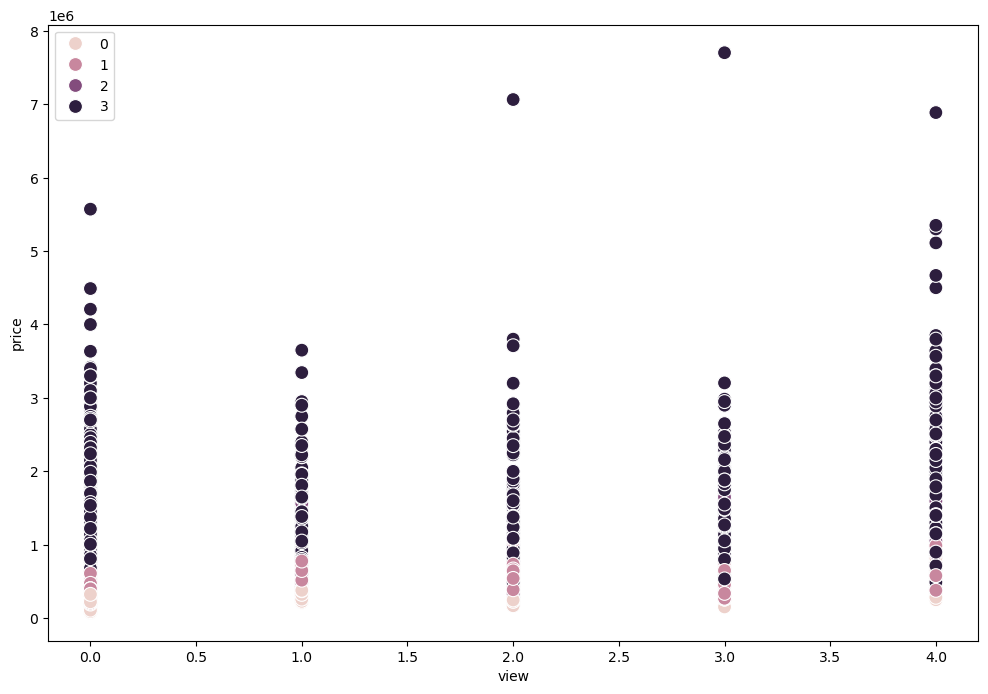

In [157]:
# Plot the clusters for the "price" and "view" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['view'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('view') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

Based on the scatter, it cannot be concluded that large, expensive homes have higher ranked views. Some of the expensive homes have a view rating of 0, which means that other factors, such as location or the size of the living area contribute more to the price than view.

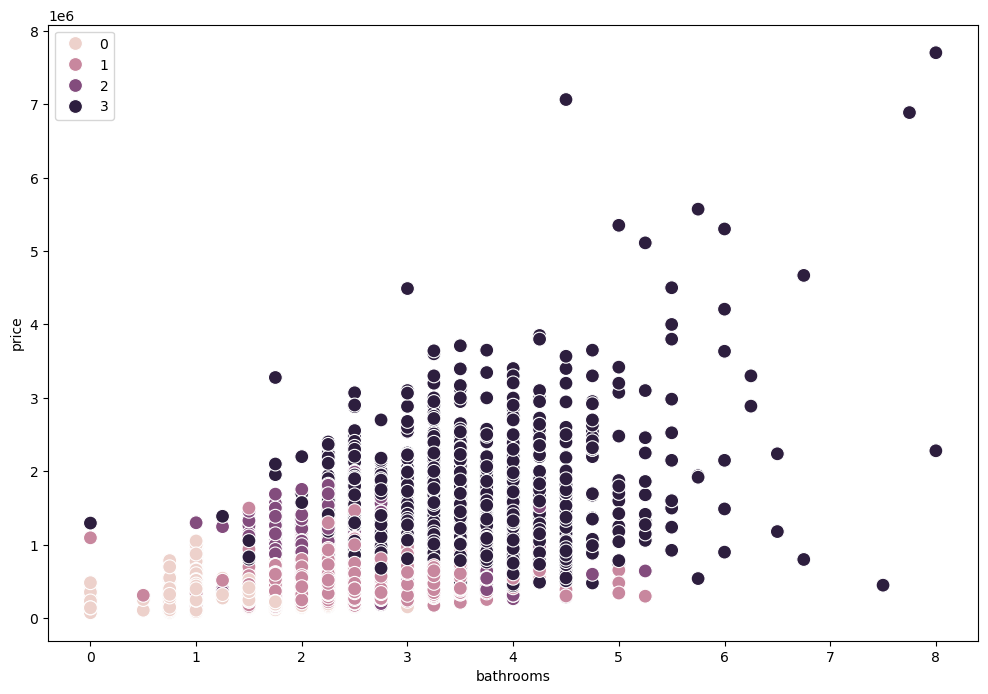

In [158]:
# Plot the clusters for the "price" and "bathrooms" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['bathrooms'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('bathrooms') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

Small, affordable homes tend to have up to 2 bathrooms. Medium affordable homes usually have 1,5 to 4 bathrooms, while medium expensive homes can have between 1.5 and 2.5 bathrooms. Large expensive homes can have up to 8 bathrooms.

This shows that medium expensive homes can actually have fewer bathrooms than medium affordable ones, meaning that for these two groups, price doesn’t depend on bathroom count. Overall, small homes tend to have fewer bathrooms, while large, expensive homes tend to have more.

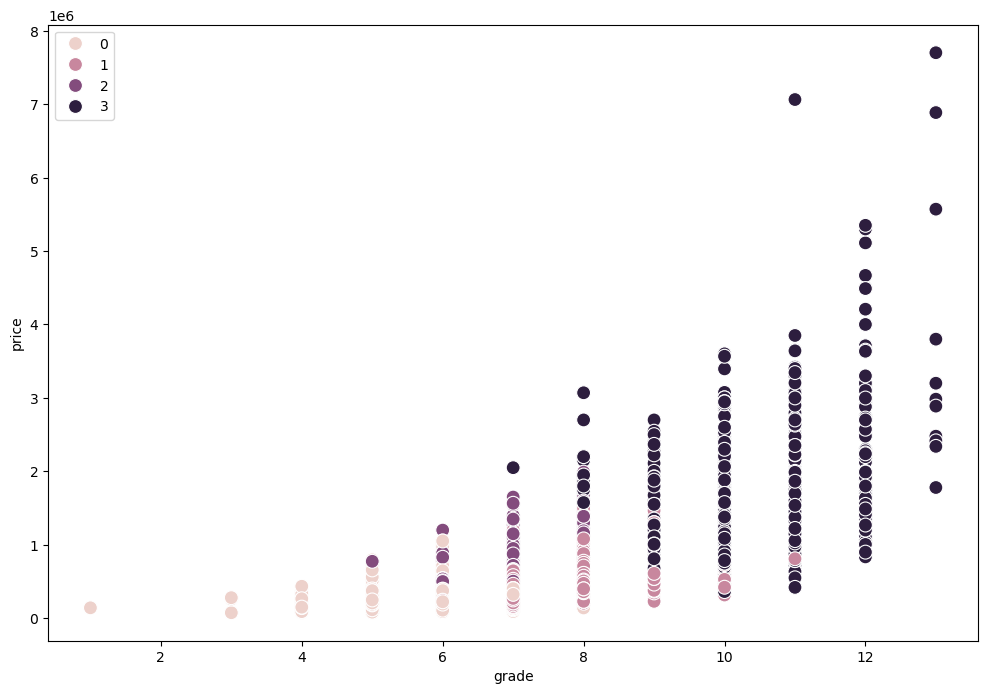

In [176]:
# Plot the clusters for the "price" and "grade" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['grade'], y=df_sub['price'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('grade') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

The small, affordable houses tend to have the lower grades (to grade 8 at most), whereas large, expensive houses tend to have the highest grades (from 9 to 13). The medium affordable houses tend to have grades from 7 to 10, whereas medium expensive houses have grades from 6 to 8. It can be concluded that although larger and more expensive houses generally have higher grades, for medium-sized houses the cheaper ones actually tend to have higher grades than the expensive ones.

### Cluster Analysis Insights from Scatterplots

The clusters were divided into 4 groups:

**Small Affordable Homes (Cluster 0)**
* 0 - 1500 sqft living area
* up to 1 mln price
* smaller sqft area above
* smaller basements
* up to 2 bathrooms
* lower grades (up to 8 at most)

**Medium Affordable Homes (Cluster 1)**
* 1500 - 3000 sqft living area
* up to 1 mln
* tend to have smaller living space, but larger above ground area
* smaller basements
* 1,5 to 4 bathrooms
* grades from 7 to 10

**Medium Expensive Homes (Cluster 2)**
* 1500-3000 sqft living area
* 1 - 2 mln
* tend to have larger total living space but smaller above-ground living area
* have larger basements
* 1.5 and 2.5 bathrooms
* grades from 6 to 8
  
**Large Expensive Homes (Cluster 3)**
* 3000+ sqft living area
* 1+ mln
* larger sqft area above
* larger basements
* up to 8 bathrooms
* highest grades (from 9 to 13)

The clusters generally make sense because they separate homes by size, price, and other features.  

Some unexpected patterns such as medium expensive homes having lower grades than medium affordable ones, show that not all features align perfectly with price. This suggests that other factors, such as location, should be explored further.

### Descriptive Statistics

In [170]:
#Descriptive Statistics
df_sub.loc[df_sub['clusters'] == 3, 'clusters'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 2, 'clusters'] = 'purple'
df_sub.loc[df_sub['clusters'] == 1, 'clusters'] = 'pink'
df_sub.loc[df_sub['clusters'] == 0, 'clusters'] = 'light pink'

df_sub.groupby('clusters').agg({'sqft_living':['mean', 'median'], 
                                'sqft_above':['mean', 'median'],
                                'sqft_basement':['mean', 'median'],
                                 'price':['mean', 'median'],
                                 'view':['mean', 'median'],
                                  'bathrooms':['mean', 'median'],
                                  'grade':['mean', 'median']})


sqft_living         sqft_above         sqft_basement         \
                   mean  median       mean  median          mean median   
clusters                                                                  
dark purple     3742.15 3550.00    3288.24 3210.00        453.92   0.00   
light pink      1336.95 1330.00    1212.99 1180.00        123.96   0.00   
pink            2135.70 2120.00    2072.11 2070.00         63.60   0.00   
purple          2332.14 2250.00    1542.58 1480.00        789.56 800.00   

                 price           view        bathrooms        grade         
                  mean    median mean median      mean median  mean median  
clusters                                                                    
dark purple 1138799.52 929475.00 0.80   0.00      3.13   3.00  9.68  10.00  
light pink   359682.11 330600.00 0.07   0.00      1.40   1.50  6.78   7.00  
pink         479688.55 450000.00 0.07   0.00      2.48   2.50  7.97   8.00  
purple       596711.32 557000.00 0.41   0.00      2.26   2.25  7.60   8.00

### Findings

**Light pink - Small Affordable Homes**
* mean sqft living - 1337 sqft
* mean sqft above - 1213 sqft
* mean sqft basement - 123.96 sqft
* mean price - 359682
* bathrooms - 1.40
* grade - 7
  
 *Small, affordable homes with limited space, few bathrooms, and basic quality.*

**Pink - Medium Affordable Homes**
* mean sqft living - 2135.70
* mean sqft above - 2072.11
* mean sqft basement - 63.60
* mean price - 479688.55
* bathrooms - 2.48
* grade - 8
  
 *Medium sized, affordable homes with moderate living space, few bathrooms, and basic to good quality.*

**Purple - Medium Expensive Homes**
* mean sqft living - 2332.14	
* mean sqft above - 1542.58
* mean sqft basement - 789.56 
* mean price - 596711.32
* bathrooms - 2.26
* grade - 8.00

 *Medium-sized, pricier homes with moderate living space, basement, few bathrooms, and good quality.*

**Dark Purple - Large Expensive Homes**
* mean sqft living - 3742.15
* mean sqft above - 3288.24
* mean sqft basement - 453.92
* mean price - 1138799.52
* bathrooms - 3.13
* grade - 10.00

 *Large, high-priced homes with large living space, multiple bathrooms, and high quality* 

The descriptive statistics aligns with the cluster segmentation above.

### Future Steps

These results could be useful for the next steps in the analytics pipeline by identifying which features most influence price within each cluster. This information can then guide marketing and investment strategies by focusing on the factors that matter most for each group.